In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(dict(location = ['New York', 'LA', 'San Fransisco'], sales = [12327, 17129, 19923]))

In [3]:
df

,location,sales
0,New York,12327
1,LA,17129
2,San Fransisco,19923


In [4]:
df.sales.sum()

49379

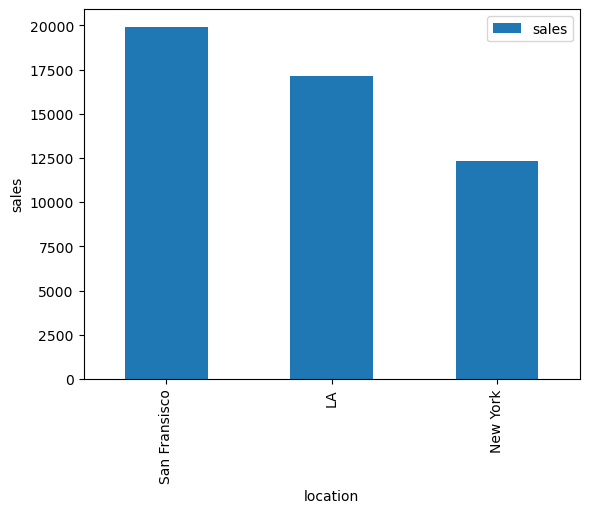

In [5]:
df.set_index('location').sort_values(by = 'sales', ascending = False).plot(kind = 'bar', ylabel = 'sales');

In [6]:
df['relative freq'] = df.sales/df.sales.sum()

In [7]:
df

,location,sales,relative freq
0,New York,12327,0.249641
1,LA,17129,0.346888
2,San Fransisco,19923,0.403471


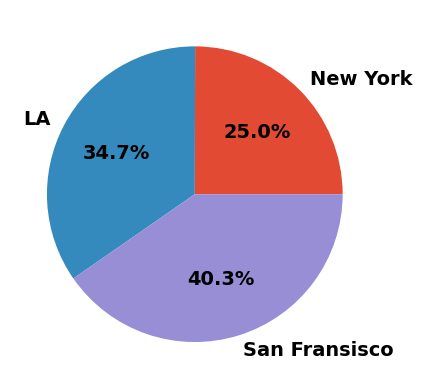

In [8]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.pie(df.sales, autopct = '%.1f%%', labels = df.location, textprops = {'fontsize': 14, 'weight': 'bold'})
plt.show()

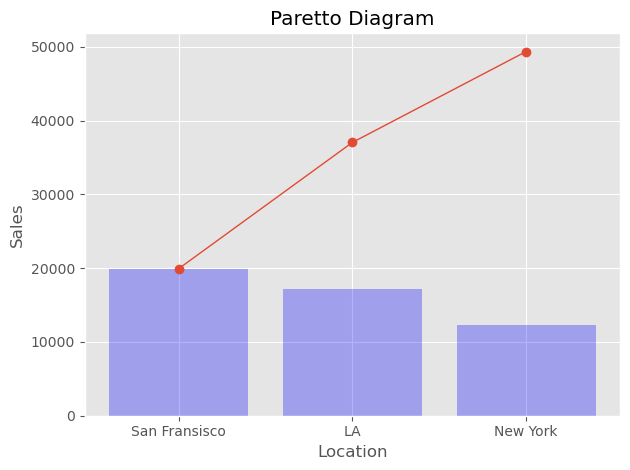

In [9]:
df.sort_values(by = 'sales', ascending = False, inplace = True)

fig, ax = plt.subplots(1, 1, dpi = 100)
ax.bar(df.location, df.sales, alpha = 0.3, color = 'blue')
ax.plot(df. location, df.sales.cumsum(), marker = 'o', linestyle = '-', linewidth = 1)
ax.set_title('Paretto Diagram')
ax.set_xlabel('Location')
ax.set_ylabel('Sales')
plt.tight_layout()
plt.show()

In [10]:
size = [650, 785, 1200, 720, 975]
price = [772000, 998000, 1200000, 800000, 895000]

In [11]:
df = pd.DataFrame(dict(size = size, price = price))

In [12]:
df

,size,price
0,650,772000
1,785,998000
2,1200,1200000
3,720,800000
4,975,895000


In [13]:
sample_minus1 = df['size'].size - 1

size_mean = df['size'].mean()
price_mean = df['price'].mean()

In [14]:
sample_minus1

4

In [15]:
size_mean, price_mean

(866.0, 933000.0)

In [16]:
df['size'].median()

785.0

In [17]:
df['price'].median()

895000.0

In [18]:
df['size'].mode()

0     650
1     720
2     785
3     975
4    1200
Name: size, dtype: int64

In [19]:
import statistics as s

In [20]:
s.mode(df['size']), s.mode(df['price'])

(650, 772000)

In [21]:
s.multimode(df['size'])

[650, 785, 1200, 720, 975]

In [22]:
s.multimode(df['price'])

[772000, 998000, 1200000, 800000, 895000]

In [23]:
df

,size,price
0,650,772000
1,785,998000
2,1200,1200000
3,720,800000
4,975,895000


In [24]:
df['size-sizebar'] = df['size'] - size_mean
df['price-pricebar'] = df['price'] - price_mean

In [25]:
df

,size,price,size-sizebar,price-pricebar
0,650,772000,-216.0,-161000.0
1,785,998000,-81.0,65000.0
2,1200,1200000,334.0,267000.0
3,720,800000,-146.0,-133000.0
4,975,895000,109.0,-38000.0


In [26]:
df['s-sb sq'] = df['size-sizebar']**2
df['p-pb sq'] = df['price-pricebar']**2

In [27]:
df

,size,price,size-sizebar,price-pricebar,s-sb sq,p-pb sq
0,650,772000,-216.0,-161000.0,46656.0,2.592100e+10
1,785,998000,-81.0,65000.0,6561.0,4.225000e+09
2,1200,1200000,334.0,267000.0,111556.0,7.128900e+10
3,720,800000,-146.0,-133000.0,21316.0,1.768900e+10
4,975,895000,109.0,-38000.0,11881.0,1.444000e+09


In [28]:
df['s-sb * p-pb'] = df['size-sizebar']*df['price-pricebar']

In [29]:
df

,size,price,size-sizebar,price-pricebar,s-sb sq,p-pb sq,s-sb * p-pb
0,650,772000,-216.0,-161000.0,46656.0,2.592100e+10,34776000.0
1,785,998000,-81.0,65000.0,6561.0,4.225000e+09,-5265000.0
2,1200,1200000,334.0,267000.0,111556.0,7.128900e+10,89178000.0
3,720,800000,-146.0,-133000.0,21316.0,1.768900e+10,19418000.0
4,975,895000,109.0,-38000.0,11881.0,1.444000e+09,-4142000.0


In [30]:
sum_s_sbar_sq = df['s-sb sq'].sum()
sum_p_pbar_sq = df['p-pb sq'].sum()

sum_products = df['s-sb * p-pb'].sum()

In [31]:
sum_s_sbar_sq

197970.0

In [32]:
sum_p_pbar_sq

120568000000.0

In [33]:
sum_products

133965000.0

In [34]:
size_variance_calc = sum_s_sbar_sq/sample_minus1
size_variance_formulae = s.variance(df['size'])

In [35]:
size_variance_calc, size_variance_formulae

(49492.5, 49492.5)

In [36]:
s.variance(df.price)

30142000000

In [37]:
import math

In [38]:
math.sqrt(size_variance_calc)

222.4690989778131

In [39]:
std_size = math.sqrt(size_variance_calc)
coeff_variation = std_size/size_mean

In [40]:
coeff_variation

0.2568927239928558

In [41]:
df

,size,price,size-sizebar,price-pricebar,s-sb sq,p-pb sq,s-sb * p-pb
0,650,772000,-216.0,-161000.0,46656.0,2.592100e+10,34776000.0
1,785,998000,-81.0,65000.0,6561.0,4.225000e+09,-5265000.0
2,1200,1200000,334.0,267000.0,111556.0,7.128900e+10,89178000.0
3,720,800000,-146.0,-133000.0,21316.0,1.768900e+10,19418000.0
4,975,895000,109.0,-38000.0,11881.0,1.444000e+09,-4142000.0


In [43]:
df['s-sb * p-pb'].sum() / sample_minus1

33491250.0

In [44]:
s.stdev(df['size']), s.stdev(df['price'])

(222.4690989778131, 173614.5155221763)

In [45]:
covar = df['s-sb * p-pb'].sum() / sample_minus1
corelation_coeff = covar/s.stdev(df['size'])/s.stdev(df['price'])
corelation_coeff

0.8671128624942823

In [49]:
df['size'].mean(), df['size'].median(), df['size'].mode(), s.variance(df['size']), s.stdev(df['size'])

(866.0,
 785.0,
 0     650
 1     720
 2     785
 3     975
 4    1200
 Name: size, dtype: int64,
 49492.5,
 222.4690989778131)

In [51]:
from scipy import stats

In [53]:
stats.variation(df['size'], ddof = 1)

0.2568927239928558

In [55]:
np.cov(df['size'], df['price'], ddof=1)

array([[4.949250e+04, 3.349125e+07],
       [3.349125e+07, 3.014200e+10]])

In [58]:
df.iloc[:, :2].corr()

,size,price
size,1.000000,0.867113
price,0.867113,1.000000
